Importing pandas, numpy and matpltlib.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The csv file contains some miscellaneous information as the first 8 rows. We use skiprows to avoid any read errors.

In [2]:
df = pd.read_csv('data/FEI_PREF_190228112345.csv', skiprows=8)

Lets take a look at what our data looks like using pandas head() to see the top 5 rows & tail() to see the last 5 rows; two important commands to run to get a good look at your dataframe.

In [3]:
df.head()

,AREA Code,AREA,YEAR Code,YEAR,/ITEMS,A1101_Total population (Both sexes)[person],Annotation,A110101_Total population (Male)[person],Annotation.1,A110102_Total population (Female)[person],Annotation.2
0,47000,Okinawa-ken,2016100000,2016,NaN,1439000,NaN,708000,NaN,732000,NaN
1,47000,Okinawa-ken,2015100000,2015,NaN,1433566,NaN,704619,NaN,728947,NaN
2,47000,Okinawa-ken,2014100000,2014,NaN,1426000,NaN,700000,NaN,725000,NaN
3,47000,Okinawa-ken,2013100000,2013,NaN,1419000,NaN,697000,NaN,722000,NaN
4,47000,Okinawa-ken,2012100000,2012,NaN,1411000,NaN,693000,NaN,719000,NaN


In [4]:
df.tail()

,AREA Code,AREA,YEAR Code,YEAR,/ITEMS,A1101_Total population (Both sexes)[person],Annotation,A110101_Total population (Male)[person],Annotation.1,A110102_Total population (Female)[person],Annotation.2
37,47000,Okinawa-ken,1979100000,1979,NaN,1094000,NaN,537000,NaN,556000,NaN
38,47000,Okinawa-ken,1978100000,1978,NaN,1081000,NaN,530000,NaN,551000,NaN
39,47000,Okinawa-ken,1977100000,1977,NaN,1071000,NaN,526000,NaN,545000,NaN
40,47000,Okinawa-ken,1976100000,1976,NaN,1058000,NaN,519000,NaN,539000,NaN
41,47000,Okinawa-ken,1975100000,1975,NaN,1042572,NaN,510754,NaN,531818,NaN


Now lets look at the kind of info inside the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
AREA Code                                      42 non-null int64
AREA                                           42 non-null object
YEAR Code                                      42 non-null int64
YEAR                                           42 non-null int64
/ITEMS                                         0 non-null float64
A1101_Total population (Both sexes)[person]    42 non-null int64
Annotation                                     0 non-null float64
A110101_Total population (Male)[person]        42 non-null int64
Annotation.1                                   0 non-null float64
A110102_Total population (Female)[person]      42 non-null int64
Annotation.2                                   0 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.7+ KB


There is a lot of columns that aren't required for our analysis. We can drop those from the dataframe. I went simple with just the single dropna command to find any columns with NaN values.

In [6]:
df = df.dropna(axis = 'columns')

Lets see what it looks like now.

In [7]:
df.head()

,AREA Code,AREA,YEAR Code,YEAR,A1101_Total population (Both sexes)[person],A110101_Total population (Male)[person],A110102_Total population (Female)[person]
0,47000,Okinawa-ken,2016100000,2016,1439000,708000,732000
1,47000,Okinawa-ken,2015100000,2015,1433566,704619,728947
2,47000,Okinawa-ken,2014100000,2014,1426000,700000,725000
3,47000,Okinawa-ken,2013100000,2013,1419000,697000,722000
4,47000,Okinawa-ken,2012100000,2012,1411000,693000,719000


Before we have a look at our dataframe, lets drop the columns AREA Code, AREA and YEAR Code. These are just taking up extra space and I already know all this data is for prefecture Okinawa.

In [8]:
df.drop(['AREA Code', 'AREA', 'YEAR Code'], axis=1, inplace=True)

Again, before we look at our finish dataframe product, lets do the final cleaning of the remaining column names to make them a bit more readable. I'm going to use the new pandas method of set_axis.

In [9]:
df.set_axis(['YEAR', 'TOTAL', 'MALE', 'FEMALE'], axis='columns', inplace=True)

Now lets take a look at the dataframe head() again.

In [10]:
df.head()

,YEAR,TOTAL,MALE,FEMALE
0,2016,1439000,708000,732000
1,2015,1433566,704619,728947
2,2014,1426000,700000,725000
3,2013,1419000,697000,722000
4,2012,1411000,693000,719000


Looks sharp. Now lets check the shape and info one final time.

In [11]:
df.shape

(42, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
YEAR      42 non-null int64
TOTAL     42 non-null int64
MALE      42 non-null int64
FEMALE    42 non-null int64
dtypes: int64(4)
memory usage: 1.4 KB


Just ran shape() and info() to ensure all values are counted as INTEGERs or FLOATs. Also just want to see how big our dataframe is and ensure our columns are properly counted. Time to run a quick and dirty plot.

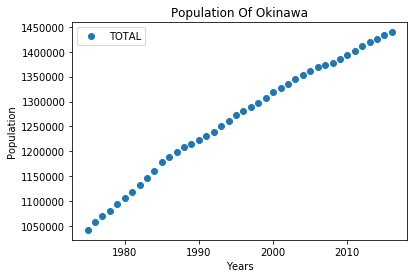

In [13]:
df.plot(x='YEAR', y='TOTAL', style='o')
plt.title('Population Of Okinawa')
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()

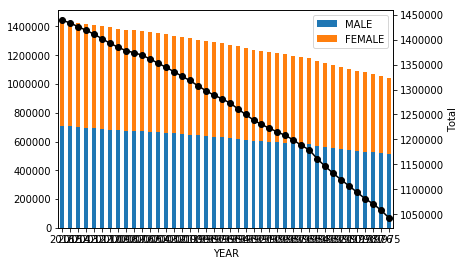

In [14]:
df.plot(x='YEAR', y=['MALE', 'FEMALE'], stacked=True, kind='bar')
ax = df['TOTAL'].plot(secondary_y=True, color='k', marker='o')
ax.set_ylabel('Total')
plt.show()

This graph is ugly but we can fix that later. Right now I just remembered we should flip our entire dataframe so that the oldest year is on top indexed as 0. Lets flip the dataframe!

In [15]:
df.head()

,YEAR,TOTAL,MALE,FEMALE
0,2016,1439000,708000,732000
1,2015,1433566,704619,728947
2,2014,1426000,700000,725000
3,2013,1419000,697000,722000
4,2012,1411000,693000,719000


The easiest way to reverse the order is just by copying the dataframe and using a step slice. [start:end:step] so the first two are blank and -1 is in the step slice. Therefore the entire dataframe is copied over in reverse order. Thanks to user Grote in the Python Discord for the help!

In [16]:
df = df.iloc[::-1]

Now we will reset the index and use the drop=True to note we are getting rid of the old index.

In [ ]:
df = df.reset_index(drop=True)

Lets check our work.

In [17]:
df.head()

,YEAR,TOTAL,MALE,FEMALE
0,1975,1042572,510754,531818
1,1976,1058000,519000,539000
2,1977,1071000,526000,545000
3,1978,1081000,530000,551000
4,1979,1094000,537000,556000


Awesome. Now lets try that plot one more time. Also, lets unstack since we can't really tell if one is growing over the other.

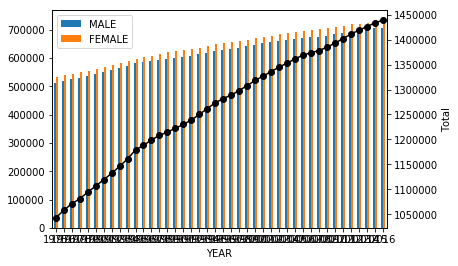

In [20]:
df.plot(x='YEAR', y=['MALE', 'FEMALE'], stacked=False, kind='bar')
ax = df['TOTAL'].plot(secondary_y=True, color='k', marker='o')
ax.set_ylabel('Total')
plt.show()

Much better. Reading normally from left to right. But this is too compact and ugly. Lets try a line graph.

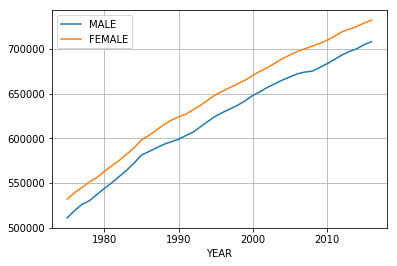

In [25]:
df.plot(x='YEAR', y=['MALE', 'FEMALE'], grid=True)

Interesting. Just by looking at this simple graph, we can see that there is a gap which might be growing between population of women and men. Also, while the women population is quite normal, the men's population had a slightly noticeable decrease sometime before 2010, maybe 2008. Let me remember how many rows we have of data.

In [44]:
df.shape

(42, 4)

Oh right, 42. Ok. So let me look at the bottom 15 rows using slice again.

In [48]:
df.iloc[-15:]

,YEAR,TOTAL,MALE,FEMALE
27,2002,1336000,657000,679000
28,2003,1345000,661000,684000
29,2004,1353000,665000,689000
30,2005,1361594,668502,693092
31,2006,1369000,672000,697000
32,2007,1374000,674000,700000
33,2008,1378000,675000,703000
34,2009,1385000,679000,706000
35,2010,1392818,683328,709490
36,2011,1402000,688000,714000


Great, 2008 is in there with some years to chew on the top. Lets find the percentage change in this little part of the dataset to see how much that slow down was and exactly where it was. Now lets use loc to show only a part of the dataframe and pct_change to find the percentage change from previous year to next.

In [74]:
df.loc[27::,['MALE', 'FEMALE']].pct_change()

,MALE,FEMALE
27,NaN,NaN
28,0.006088,0.007364
29,0.006051,0.007310
30,0.005266,0.005939
31,0.005233,0.005639
32,0.002976,0.004304
33,0.001484,0.004286
34,0.005926,0.004267
35,0.006374,0.004943
36,0.006837,0.006357


You can see that while the FEMALE percentage change from these years is generally above .4 percent, the MALE had a slow down at index 33 which is year 2008. The change dropped down to .001484 here. OK. Now lets move on to predictions!

In [83]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [89]:
import sklearn

ImportError: No module named sklearn